# MediaStack

# Resources
docs: https://mediastack.com/documentation

Supported categories

- general: uncategorised news,
- business,
- entertainment,
- health,
- science
- sports,
- technology

Supported countries

https://mediastack.com/sources

Supported languages

- arabic: ar,
- german: de,
- english: en,
- spanish: es,
- french: fr,
- hebrew: he,
- italian: it,
- dutch: nl,
- norwegian: no,
- portuguese: pt,
- russian: ru,
- swedish: se,
- chinese: zh

# Params:

sources - specify sources to search or not search

categories - specific category to search from general, business, entertainment, health, science, sports, technology

countries - specify country from 2-letter country code.

languages - specify languages with 2-letter language codes

keywords - search for comma separated keywords

# Response Output:

author - author name

category - category the article belongs to

country - country code the article is from

description - description of news article

language - language article is written in

published_at - date and time of article

source - source of article

title - title of article

url - url of article

In [80]:
import requests
from pprint import pprint
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from scipy import spatial
import matplotlib.pyplot as plt
from requests.exceptions import ContentDecodingError

In [81]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [50]:
key = "55238f7088d3fd8febe76a2485ebfccf"

In [58]:
search_term = 'modern slavery'

In [62]:
params={
    "access_key": key,
    "keywords": search_term,
    "categories": "general",
    "languages": "en",
    "countries": "gb",
    "limit": 50, #max value is 100 per call,
    "offset": 0, #sets pagination offset
    "sort": "published_desc", #sets sorting order for results
}
search_url = f"http://api.mediastack.com/v1/news"
response = requests.get(search_url, params=params)
search_results = response.json()

# Inpsect output keys

In [72]:
search_results.keys()

dict_keys(['pagination', 'data'])

In [73]:
search_results["pagination"]

{'limit': 50, 'offset': 0, 'count': 50, 'total': 146}

# Inspect results

In [63]:
results = search_results["data"]

In [74]:
pprint(results[0])

{'author': 'GameCentral',
 'category': 'general',
 'country': 'gb',
 'description': 'Despite all the controversy over whether it’ll become an Xbox '
                'exclusive, the latest Call Of Duty is the fastest selling '
                'ever on PS4 and PS5.',
 'image': None,
 'language': 'en',
 'published_at': '2022-11-01T11:28:51+00:00',
 'source': 'Metro',
 'title': 'Modern Warfare 2 is biggest Call Of Duty launch ever for '
          'PlayStation',
 'url': 'https://metro.co.uk/2022/11/01/modern-warfare-2-is-biggest-call-of-duty-launch-ever-for-playstation-17676366/'}


In [75]:
metadata = []
for result in results:
    metadata.append(list(result.keys()))
print(list(set([a for b in metadata for a in b])))

['url', 'category', 'title', 'published_at', 'source', 'author', 'language', 'description', 'country', 'image']


# Insepct descriptions

In [76]:
description_length = []
for result in results:
    print(result["description"])
    description_length.append(len(result["description"]))
    print("---------------------------------------------")

Despite all the controversy over whether it’ll become an Xbox exclusive, the latest Call Of Duty is the fastest selling ever on PS4 and PS5.
---------------------------------------------
Heidi Porter has no regrets about her six years of activism, and still holds out hope she'll see the fruits of her labour in her lifetime, despite admitting it has 'cost me my sanity many, many times'.
---------------------------------------------
Police launched investigation after Homes for Ukraine arrangement broke down
---------------------------------------------
Disgruntled Call Of Duty fans have taken umbrage with Modern Warfare 2’s menu system and unfavourably comparing it to Hulu.
---------------------------------------------
Aside from other launch day issues, Modern Warfare 2 fans are stunned to learn they can't turn off crossplay unless they're on PlayStation.
---------------------------------------------
Local split-screen multiplayer is thankfully still a thing in Modern Warfare 2, but th

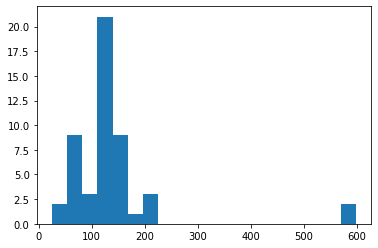

In [77]:
plt.hist(description_length, bins=20)
plt.show()

# Try and extract content

In [78]:
def get_text_from_url(url, description):
    try:
        page = requests.get(url)
        
        soup = BeautifulSoup(page.content, "html.parser")
        for script in soup(["script", "style"]):
            script.extract()

        text = soup.get_text()

        lines = (line.strip() for line in text.splitlines())

        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

        text = '\n'.join(chunk for chunk in chunks if chunk)

        clean_text = []

        for line in text.splitlines():
            if len(line) > 30:
                sentences = [description, line]
                embeddings = model.encode(sentences)
                result = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])
                if result > 0.25:
                    clean_text.append(line)


        text = ". ".join(clean_text)
        return text
    
    except ContentDecodingError:
        pass

In [82]:
for result in results:
    description = result["description"]
    url = result["url"]
    print(get_text_from_url(url, description))
    print("--------------------------------------------------------------")

Modern Warfare 2 is biggest Call Of Duty launch ever for PlayStation | Metro News. Modern Warfare 2 is biggest Call Of Duty launch ever for PlayStation. Call Of Duty has got its mojo back (pic: Activision)Despite all the controversy over whether it’ll become an Xbox exclusive, the latest Call Of Duty is the fastest selling ever on PS4 and PS5.. According to Microsoft, they’re going to keep Call Of Duty multiformat ‘as long as there’s a PlayStation out there to ship to’, but many people don’t believe them. Just as they wouldn’t believe the promise of any corporation that wasn’t going to be held to account if they changed their tune.. Nevertheless, Xbox boss Phil Spencer is currently adamant that they won’t change their mind later and reason number one is pretty simple: because it sells the most on PlayStation 5 and 4. In fact, no Call Of Duty has sold more at launch than the new Modern Warfare 2.. Activision hasn’t released any figures, so it’s not clear how well it did on Xbox or exact

Woman hosting Ukrainian refugee probed by police for ‘modern slavery’ after ‘dishes row’ | The Independent Jump to contentUK EditionChange. Thank you for registeringPlease refresh the page or navigate to another page on the site to be automatically logged inPlease refresh your browser to be logged inNewsUKHome NewsWoman hosting Ukrainian refugee probed by police for ‘modern slavery’ after ‘dishes row’Police launched investigation after Homes for Ukraine arrangement broke down Emily AtkinsonSaturday 29 October 2022 21:11. Tens of thousands of Ukranians were welcomed to the UK after the war with Russia began. Please enter a valid email addressPlease enter a valid email addressSIGN UPI would like to be emailed about offers, events and updates from The Independent. Read our privacy noticeA mother-of-two was investigated for “modern slavery” after a Ukrainian refugee she was hosting in the UK complained to the police. Hannah Debenham and her husband invited the woman and her 10 year-old dau

Call Of Duty: Modern Warfare 2: how to play split-screen multiplayer | Metro News. Call Of Duty: Modern Warfare 2: how to play split-screen multiplayer. Call Of Duty: Modern Warfare 2 – unlike Call Of Duty: Warzone, the newest release still offers local play (pic: Activision)Local split-screen multiplayer is thankfully still a thing in Modern Warfare 2, but there are a couple hurdles to getting it working.. For all of Call Of Duty’s faults (and depending on who you ask, there are many), it’s yet to discard local split-screen multiplayer even as the games industry attempts to push for purely online experiences.. Call Of Duty: Modern Warfare 2 is no different, so if you have a friend round and you want to play the game together, they don’t have to bring their console or PC with them.. In case you need a refresher, or this is your first Call Of Duty, here’s how you can get local split-screen multiplayer working in Modern Warfare 2.. How to play local split-screen multiplayer in Call Of Du

Games Inbox: Is Call Of Duty Modern Warfare 2 worth getting? | Metro News. Call Of Duty: Modern Warfare 2 – it’s that time of year again (pic: Activision)The Friday letters page continues the arguments of 30fps vs. 60fps (and 40fps), as one reader admits to enjoying Gotham Knights.. Please be moderately excitedSo it’s launch day on Friday for Call Of Duty: Modern Warfare 2 and I’m… moderately excited? I’m not expecting any big surprises, in fact I know there aren’t any, but I pre-ordered and I’ve played the campaign and the beta, and I thought it was all pretty good.. I’m not sure why the campaign was cribbing so much from the first Modern Warfare but overall I enjoyed it and I was really impressed by the graphics. Some of the best I’ve seen this generation and while there was still some uncanny valley going on with the characters they’re still really impressive.. Ire discrepancySo with the uproar regarding Gotham Knights not running at 60fps and some people’s ire at this I have a ques

The Independent’s journalism is supported by our readers. When you purchase through links on our site, we may earn commission.ExtrasIndyBestTechVideo Games & ConsolesCall of Duty Modern Warfare 2 single-player review: A disappointing spectacle with nothing new to sayWar, what is it good for? Jasper PickeringThursday 27 October 2022 14:00. Modern Warfare 2 spends much time replicating the series’s biggest (and better) moments. ✕Subscribe to Independent Premium to bookmark this articleWant to bookmark your favourite articles and stories to read or reference later? Start your Independent Premium subscription today.SubscribeAlready subscribed? Log in‘Call of Duty: Modern Warfare 2'Release date: 28 October 2022Publisher: ActivisionDeveloper: Infinity WardAge rating: 18+Buy for £59.99The latest game in the series follows the covert exploits of Task Force 141 and Mexican Special Forces, working in a joint operation against the (fictional) terrorist cell Al-Qatala, which has managed to come in

Modern Warfare 2 players warned not to switch regions for early access | Metro News. Modern Warfare 2 players warned not to change regions for early access – but they’ll still do it. They’re not changing their minds (pic: Activision)You might want to think twice if you were planning on changing your location to access Modern Warfare 2 multiplayer early, warns Infinity Ward.. After months of anticipation, Call Of Duty: Modern Warfare 2 will finally launch in less than 24 hours across all platforms. Naturally, many players are keen to find ways to access the game even earlier, to get a taste of the new campaign and multiplayer.. One cheeky method that you can use is to change your digital location to New Zealand, to unlock the game as soon as the date changes in the country, even if you’re on the other side of the globe.. As this isn’t an uncommon practice amongst the gaming community, Infinity Ward has decided to issue a warning to dissuade players from doing it, by putting out a ‘launc

Modern Warfare 2 multiplayer pre-load and system requirements for PC | Metro News. Modern Warfare 2 multiplayer pre-load and system requirements for PC. The clock is ticking! (pic: Activision)PC players around the world will soon be able to pre-load the full version of Call Of Duty: Modern Warfare 2, a few hours ahead of its official launch.. The release of Modern Warfare 2’s multiplayer is imminent – a week after some got early access to the campaign – and it’s bringing with it a bunch of new features, including new modes and a revamped Gunsmith system.. While PlayStation and Xbox players had the luxury of pre-loading the game a week early, PC players didn’t get the same treatment. Luckily, you don’t need to wait much longer, as the game’s pre-load process will unlock soon, giving you a day to prepare before it launches on Friday, October 28.. Before you go through with the hefty 72GB download, you might also need to clean out your game library and say goodbye to some golden oldies fi

Call of Duty: Modern Warfare 2 – have you played it? (pic: Activision)The Wednesday letters page considers the strange case of Metal Gear Solid’s English translation, as one reader bets on Elden Ring for GOTY.. Interpret vs. translateI have to disagree with Ghostcaller and his suggestion a Metal Gar Solid movie wouldn’t work without Kojima. In my opinion, the best dialogue in any Metal Gear Solid game is the original PlayStation one and that’s down to the American translator, Jeremy Blaustein.. There is a great article about it on Polygon and ever since reading it it’s helped me understand why the hell it’s so hard to follow what’s going on in all the subsequent Metal Gear Solid games.TommyFatFingers. GC: It’s a good article. Kojima’s response to hearing it wasn’t a 1:1 translation has always seemed wrong-headed.. Ikea threatens legal action over indie horror game not set in IkeaA good cropSo Elden Ring is an obvious contender for game of the year and now so too is Bayonetta 3, surpris

Sunak will be youngest UK prime minister in modern political history | The Independent. Thank you for registeringPlease refresh the page or navigate to another page on the site to be automatically logged inPlease refresh your browser to be logged inNewsUKSunak will be youngest UK prime minister in modern political historyThe 42-year-old will also be the country’s first non-white PM.Ian JonesMonday 24 October 2022 14:31. ✕CloseHere Are the Top Contenders for UK Prime MinisterFor free real time breaking news alerts sent straight to your inbox sign up to our breaking news emailsSign up to our free breaking news emails. Please enter a valid email addressPlease enter a valid email addressSIGN UPI would like to be emailed about offers, events and updates from The Independent. Read our privacy noticeRishi Sunak will be the youngest UK prime minister in modern political history.At 42, he is a year younger than the current record-holder David Cameron, who was 43 when he became PM in 2010.Tony B

Modern Warfare 2 DLC includes zombies according to deleted datamine | Metro News. Modern Warfare 2 DLC includes zombies according to deleted datamine. This marks the first time zombies have appeared in a Modern Warfare title (pic: Activision)Activision has taken down images claiming Call Of Duty: Modern Warfare 2 is getting a zombies mode.. Zombies have long been an iconic part of the Call Of Duty series but not necessarily the Modern Warfare sub-series. For the most part Zombies mode has been relegated to the Treyarch developed titles, such as the Black Ops sub-series, although they have appeared in others as well.. Treyarch made a Zombies mode for Sledgehammer Games’ Call Of Duty: Vanguard, for example, and Infinity Ward had them in Infinite Warfare. However, they’ve never appeared in any Modern Warfare title.. This was apparently to keep the Modern Warfare games feeling more realistic (that was the case for the 2019 game at least), but it’s looking like that won’t be the case for th

India trade deal ‘would open UK to goods produced by child labour and modern slavery’ | The Independent Jump to contentUK EditionChange. Thank you for registeringPlease refresh the page or navigate to another page on the site to be automatically logged inPlease refresh your browser to be logged inNewsUKUK PoliticsIndia trade deal ‘would open UK to goods produced by child labour and modern slavery’Britain’s TUC and Indian unions alike have raised concerns about deteriorating work conditions for workers, low pay and exploitation Jon StonePolicy CorrespondentSaturday 22 October 2022 19:59Comments. Please enter a valid email addressPlease enter a valid email addressSIGN UPI would like to be emailed about offers, events and updates from The Independent. Read our privacy noticeUnions representing tens of millions of workers in India are calling on Britain to suspend talks on a trade deal with the country, warning it would open UK markets to goods produced by child labour and modern slavery.A

Modern Warfare 2 campaign is six hours long… if you rush it | Metro News. Modern Warfare 2 campaign is six hours long… if you rush it. Call Of Duty: Modern Warfare 2 – it’s unsurprisingly about as long as previous Call Of Duty campaigns (pic: Activision)Those who pre-ordered Call Of Duty: Modern Warfare 2 haven been playing its campaign mode already, revealing how long it takes to beat.. The full game doesn’t launch for another week, but those who have pre-ordered Call Of Duty: Modern Warfare 2 (at least digitally) have early access to its single-player campaign.. The early access period began on Thursday, which means some have cleared the campaign and learned some additional details that latecomers may be interested in knowing.. Namely, how long it will take, on average, to beat the campaign, as well as how many missions there are. Don’t worry, we won’t be sharing any story spoilers, though we wouldn’t be surprised if they’re already floating about online.. How long does it take to be

Call of Duty: MW2 Special Ops mode: release date and mission details | Metro News. Call of Duty: Modern Warfare 2 Special Ops mode: release date and mission details. A revamped version of Special Ops will launch alongside the full game (pic: Activision)More details are surfacing about Call Of Duty: Modern Warfare 2’s take on Special Ops mode, which will go live after the official launch.. You’ve officially entered the final countdown to Modern Warfare 2’s launch, with less than a week remaining until the game unlocks across all platforms.. As usual, the game will have a co-op mode, but rather than Zombies it’ll be the Special Ops mode that always used to be part of Infinity Ward’s games.. At first, Special Ops will launch with three missions, though Activision has confirmed that more will be added in the future, including extra difficult endgame raids. These will be large-scale missions that take place in Al Mazrah, the new map location for Warzone 2.. When playing this mode, you’ll ha

Mattresses Mattress buying guideMattress toppersMattresses for back painHousehold appliances. SmartwatchesSmartwatches for kidsComputer accessories. Baby monitorsBaby walkersHigh chairsChanging bagsGifts for new parentsBaby sleep aidsBaby and toddler bath towelsBaby bouncersBaby mobilesPlay matsBaby and toddler bath toysBaby blanketsBaby bottle sterilisersSleeping bags for babies and toddlersBaby carriersEco-friendly nappiesNight lightsSports. Car seatsTravel cotsSunscreens for babiesCar seats buying guideBaby trainersSunscreens for kidsKids sunglassesWater bottles for kidsPushchairs. The Independent’s journalism is supported by our readers. When you purchase through links on our site, we may earn commission.ExtrasIndyBestTechAudio7 best DAB radios for kitchen discos and garden partiesFrom retro designs to modern alarm clocks, these are our top-rated picksDavid TaylorWednesday 19 October 2022 18:49. (iStock/The Independent)Sign up to our free weekly newsletter for insider tips and prod

Modern Warfare 2 pre-load times and dates for consoles and PC | Metro News. Call Of Duty: Modern Warfare 2 pre-load times and dates for consoles and PC. Modern Warfare 2 is almost here (pic: Activision)Call Of Duty: Modern Warfare 2 is out very soon but if you want to get it as early as possible you should check the times for when you can pre-load it.. Modern Warfare 2 is out on Friday, October 28 and promises to add a suite of new features to its multiplayer, ranging from aquatic combat to a third person mode.. On top of that, Activision has decided to roll out the game’s campaign mode a week earlier than usual, to give you more of an incentive to play the game’s single-player mode.. Modern Warfare pre-load dates for PS4, PS5 and Xbox. If you’ve already pre-ordered the game, but you’re not sure when each element drops, here you’ll find all the important dates and times for the upcoming launch.. An important point to note is that there’ll be a regional rollout for PlayStation and Xbox,

Modern Warfare 2 campaign: early access, release date and rewards | Metro News. Modern Warfare 2 campaign: early access, release date and rewards. Four Operators are making a comeback in Modern Warfare 2 (pic: Activision)Call Of Duty: Modern Warfare 2’s single-player campaign is available to play a week early – but only if you pre-ordered.. Modern Warfare 2 is set to launch on October 28, but you won’t necessarily have to wait that long to jump into the campaign and see what Task Force 141 is up to.. This year Activision has decided to switch things around and encourage more players to check out the campaign first, as it usually gets neglected for the game’s multiplayer mode. After all, unlocking new weapons and achieving prestige ahead of others has always been prioritised by most players.. Now, the new schedule will not only give you the chance to jump in the game a week early but also unlock a number of exclusive items for use in multiplayer.. When can you start playing Modern Warfa

Xbox Series S is holding back ‘entire generation’ and Gotham Knights | Metro News. Xbox Series S is holding back ‘entire generation’ and Gotham Knights says dev. Can you spot the difference? (pic: Metro.co.uk)A Rocksteady developer has described the Xbox Series S as a ‘potato’ that has ‘hamstrung’ modern games on next gen consoles.. To most people the Xbox Series S is the best bargain of the generation, especially when combined with Xbox Game Pass. It’s significantly cheaper than the Xbox Series X and yet runs all the same games, with the only apparent drawback being no native 4K support and a lack of a disc drive.. However, on paper it is considerably less powerful than either of the more expensive next gen consoles and one developer claims that it’s actually holding back the entire generation, since it becomes the lowest common denominator that all multiformat games must support.. The suggestion comes from Lee Devonald, the senior character technical artist at Rocksteady, makers of t

Home secretary accused of ‘scapegoating’ modern slavery victims as new laws planned | The Independent Jump to contentUK EditionChange. Thank you for registeringPlease refresh the page or navigate to another page on the site to be automatically logged inPlease refresh your browser to be logged inNewsUKHome NewsHome secretary accused of ‘scapegoating’ modern slavery victims as new laws plannedSuella Braverman wants to go beyond Priti Patel and change the law to stop alleged abuse of system by small boat migrants Lizzie DeardenHome Affairs EditorSaturday 15 October 2022 16:26Comments. Suella Braverman is drawing up new laws in a bid to cut the number of migrants crossing the Channel. Please enter a valid email addressPlease enter a valid email addressSIGN UPI would like to be emailed about offers, events and updates from The Independent. Read our privacy noticeThe government has been accused of “scapegoating” modern slavery victims as it draws up new laws to restrict claims by asylum seek

Kwasi Kwarteng: what has been the ex-chancellor career to date? | Evening Standard. NewsPoliticsKwasi Kwarteng: what has been the ex-chancellor’s career to date?The shortest-serving chancellor since 1970 has been an MP for 12 years. Kwasi Kwarteng had earlier worked at the Treasury before his brief stint as chancellor. Seren Morris14 October 2022Kwasi Kwarteng has resigned as Chancellor of the Exchequer because of the backlash to his mini-budget. He was recalled from an IMF meeting in Washington DC and met the prime minister, Liz Truss, on Friday October 14, who asked for his resignation.He had earlier hit a record low approval rating because of the mayhem caused by his mini-budget, according to a poll, which revealed 65 per cent of people in the UK were dissatisfied with him. His U-turn in ditching his plan to axe the 45p top rate of income tax was not enough to save him and, after he went, Truss announced she was reversing a plan to scrap an increase in corporation tax from 19 per ce

The chancellor earlier said his “total focus is on delivering on the mini-budget” in response to speculation about a U-turn on the measures. Kwarteng said he is “not going anywhere”. Liz Truss is on the cusp of putting up corporation tax as part of a Downing Street plan to back down from the huge package of unfunded tax cuts in her mini-budget, sources claim.. Senior Conservatives are holding talks about replacing Liz Truss with a joint ticket of Rishi Sunak and Penny Mordaunt as part of a “coronation” by MPs, according to The Times. Party grandees are understood to be in talks about replacing Truss with a “unity candidate”. Former home secretary Priti Patel has become the latest high-profile Tory MP to suggest the government could be forced into a further U-turn over the mini-budget. Patel was asked if Liz Truss’s commitment not to raise corporation tax should be reversed to calm the markets. “There is an irony to this,” Patel told Sky News. “In that market forces will probably dictat

Nicola Sturgeon detests Tories and still craves independence. But her route to it is perilous | Martin Kettle | The Guardian. TopicsScottish independenceOpinionScottish National party (SNP)Scottish politicsScotlandNicola SturgeonLabourcommentReuse this contentMore on this storyMore on this storyScottish Labour vows to ‘bring people together’ over gender recognition reform4d agoFormer officer accuses Police Scotland of ‘cover-up’ attitude to misogyny1d agoTelephone and internet restored in Shetland after cable damage21 Oct 2022SNP suffers biggest ever backbench revolt over transgender bill5d agoEdinburgh suffragist statue put on hold after bitter row over sculptor21 Oct 2022SNP minister quits in protest at gender recognition reform bill5d agoShetland loses telephone and internet services after subsea cable cut20 Oct 2022Independence will rid Scotland of UK economic chaos, says Nicola Sturgeon17 Oct 2022Migrant students in Scotland win equal right to free tuition in landmark case13 Oct 2

Blackadder writer Ben Elton compares woke culture with Mao's Communist China | Daily Mail Online. Blackadder writer Ben Elton compares modern wokery with Chairman Mao's communist China and says younger generation is 'all about making rules'Ben Elton, 63, has compared the modern woke movement to communist ChinaThe comedian said there are 'rules' and 'things you can no longer say' Comedian Jennifer Saunders previously said the woke mindset changed comedyBy Danya Bazaraa For Mailonline. Comedian Ben Elton has compared the modern woke movement to communist China, claiming 'there are things you can no longer say'. Elton, 63, who found fame as a screenwriter on Eighties sitcoms Blackadder and The Young Ones, contrasted comedy in the past and now – saying his generation was all about 'breaking rules' while the younger generation today is all about 'making rules'. Speaking to Radio Times, Elton said: 'There is a whiff of Maoism in the air, the whiff of cultural revolution.. Comedian Ben Elton 